In [24]:
import pandas as pd
import numpy as np
from collections import Counter
import re

### Leemos dataset, notar que se debe seleccionar el encoding correcto para este caso

In [56]:
dataset = pd.read_csv('tw_source.csv', encoding='latin_1', 
                      header=None)
dataset.columns = ['valor','id','fecha','fuente', 'usuario','tweet']


In [63]:
#dataset = dataset['tweet']
dataset.shape

(1600000, 6)

In [27]:
sub_dataset = dataset [:100]
#sub_dataset

In [28]:
#[palabra for palabra in dataset[1000].split(' ') if '@' in palabra]

['@JonathanRKnight', '@silver_tulip27']

In [29]:
dataset[1000].split(' ')

['@JonathanRKnight',
 '@silver_tulip27',
 'Um,',
 'that',
 'would',
 'be',
 'a',
 'hell',
 'no',
 'to',
 'the',
 'fugly',
 'poker',
 'dog',
 'pants',
 'on',
 'the',
 'cruise!',
 '',
 'Hi',
 'Jonathan,',
 'sorry',
 'I',
 'missed',
 'you',
 '']

In [30]:
lista_menciones = [] # para crear un diccionario. para el total se tiene que poner "in dataset"

for tweet in dataset:
    ats_in_tweet = [palabra for palabra in tweet.split(' ')if '@' in palabra]
    lista_menciones.extend(ats_in_tweet)

### Crear la lista de menciones de la columna tweet

In [60]:
lista_menciones = [] # para crear un diccionario.
filas_per_at = {}
cont = 0

for tweet in dataset['tweet']:
    ats_in_tweet = [palabra for palabra in tweet.split(' ')if '@' in palabra]
    lista_menciones.extend(ats_in_tweet)
    
    try:
        ultimo_at = ats_in_tweet[len(ats_in_tweet) - 1]
        filas_per_at.setdefault(ultimo_at, []).append(cont)
    except:
        pass
    finally:
        cont = cont + 1

In [32]:
filas_per_at

{'@switchfoot': [0,
  122396,
  204318,
  532683,
  665568,
  792721,
  854059,
  904038,
  914966,
  1374695,
  1504823],
 '@Kenichan': [2,
  57116,
  199137,
  472424,
  792505,
  792852,
  801886,
  822783,
  910747,
  994374,
  995103,
  1143200,
  1186198],
 '@nationwideclass': [4,
  837013,
  838724,
  861205,
  1083926,
  1084349,
  1136751,
  1245113,
  1353577,
  1534845],
 '@Kwesidei': [5],
 '@LOLTrish': [7, 1533551],
 '@Tatiana_K': [8, 91831, 206627, 225987, 456474, 592898, 899631, 1055959],
 '@twittera': [9, 639600, 898489],
 '@caregiving': [12, 1015505],
 '@octolinz16': [13],
 '@smarrison': [14],
 '@iamlilnicki': [15],
 '@LettyA': [18, 198834, 326284],
 '@FakerPattyPattz': [19, 1251980],
 '@alydesigns': [20],
 '@angry_barista': [22],
 '@alielayus': [31],
 '@julieebaby': [33, 502801],
 '@HumpNinja': [34, 979506],
 '@cocomix04': [36],
 '@MissXu': [37,
  314455,
  476832,
  486332,
  804695,
  849531,
  861941,
  911735,
  912205,
  913773,
  971299,
  1007081,
  1027091,
  1

In [61]:
contador_menciones = Counter(lista_menciones) #cuenta cuantas menciones hay
usuarios_mas_mencionados = contador_menciones.most_common(4)[1:]

### Obtener los usuarios mas mencionados

In [62]:
usuarios_mas_mencionados

[('@mileycyrus', 4310), ('@tommcfly', 3837), ('@ddlovato', 3349)]

In [66]:
filas_mileycyrus = filas_per_at['@mileycyrus']
filas_mileycyrus[:10]

[1021, 2014, 2073, 2080, 2156, 2220, 2275, 2461, 3859, 4191]

In [64]:
dataset.iloc[1021, 5]

'@mileycyrus hahaha dont be like that one time in NY when you got 30 mins of sleep then got sick  love you!!'

In [46]:
len(filas_per_at['@mileycyrus']) #cantidad de tweets, no necesariamente corresponde a la cantidad de menciones.

4101

In [68]:
filas_tommcfly = filas_per_at['@tommcfly']
filas_tommcfly[:10]

len(filas_per_at['@tommcfly']) #cantidad de tweets, no necesariamente corresponde a la cantidad de menciones.

3651

In [69]:
filas_tommcfly[:10]

[1789, 2514, 3029, 3524, 3783, 4916, 6465, 6541, 8109, 10060]

In [70]:
dataset.iloc[3524, 5]

'@tommcfly hey, no chance of adding brighton or eastbourne to the UCAP tour? gutted im missing out this time round  i love you guys!'

In [71]:
filas_lovato = filas_per_at['@ddlovato']
filas_lovato[:10]

len(filas_per_at['@ddlovato']) #cantidad de tweets, no necesariamente corresponde a la cantidad de menciones.

3155

In [72]:
filas_lovato[:10]

[573, 7032, 7089, 8611, 9492, 12453, 12876, 13265, 13427, 13442]

In [73]:
dataset.iloc[7089, 5]

'@ddlovato hey demi, wen are you and selena gonna do another video? i miss them '

### Calculo columna length

In [76]:
dataset['length']=dataset['tweet'].apply(len)
dataset.head()

,valor,id,fecha,fuente,usuario,tweet,length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111


### Creación Corpus

In [78]:
corpus_mileycyrus = dataset.iloc[filas_mileycyrus, [2,5,6]]
corpus_mileycyrus

,fecha,tweet,length
1021,Mon Apr 06 23:30:57 PDT 2009,@mileycyrus hahaha dont be like that one time ...,107
2014,Tue Apr 07 00:45:20 PDT 2009,"@mileycyrus i have the same problem, but it's ...",137
2073,Tue Apr 07 00:49:07 PDT 2009,@mileycyrus I guess counting sheep didn't work...,72
2080,Tue Apr 07 00:49:44 PDT 2009,@mileycyrus I would too if it meant spending a...,100
2156,Tue Apr 07 00:56:41 PDT 2009,@mileycyrus AWWW u seriously have the cutest d...,112
...,...,...,...
1595291,Tue Jun 16 06:52:58 PDT 2009,Hey @mileycyrus I voted for you at the teen ch...,104
1596796,Tue Jun 16 07:31:21 PDT 2009,@mileycyrus http://twitpic.com/7f5fy - I love ...,112
1597905,Tue Jun 16 07:55:55 PDT 2009,@mileycyrus i see the photos of your KISS iss ...,74
1598348,Tue Jun 16 08:04:20 PDT 2009,@mileycyrus i am definitley definitley getting...,139


In [79]:
corpus_tommcfly = dataset.iloc[filas_tommcfly, [2,5,6]]
corpus_tommcfly

,fecha,tweet,length
1789,Tue Apr 07 00:26:52 PDT 2009,@tommcfly Good morning Tom! Why can't I send y...,131
2514,Tue Apr 07 01:23:07 PDT 2009,@tommcfly did you know that johnsons baby use ...,96
3029,Tue Apr 07 02:03:41 PDT 2009,"@dougiemcfly @tommcfly good morning guys, how ...",108
3524,Tue Apr 07 02:46:02 PDT 2009,"@tommcfly hey, no chance of adding brighton or...",131
3783,Tue Apr 07 03:05:49 PDT 2009,"@tommcfly have fun tom, i need to buy eclipse ...",82
...,...,...,...
1594946,Tue Jun 16 06:46:41 PDT 2009,@tommcfly you should record Star Girl with JB,46
1595131,Tue Jun 16 06:50:40 PDT 2009,@tommcfly why you at the studio then? just wa...,125
1595194,Tue Jun 16 06:50:59 PDT 2009,@tommcfly Gonna make a trip to England in the ...,71
1597053,Tue Jun 16 07:37:16 PDT 2009,@tommcfly Heya Tom! You should follow Peter Fa...,102


In [80]:
corpus_lovato = dataset.iloc[filas_lovato, [2,5,6]]
corpus_lovato

,fecha,tweet,length
573,Mon Apr 06 22:58:30 PDT 2009,@ddlovato Do you hate us?? Please don't,40
7032,Tue Apr 07 07:02:58 PDT 2009,@ddlovato Wish that i could see it.. Thats th...,96
7089,Tue Apr 07 07:05:11 PDT 2009,"@ddlovato hey demi, wen are you and selena gon...",79
8611,Fri Apr 17 20:31:31 PDT 2009,@ddlovato ahhhh i wish i could go to the dalla...,85
9492,Fri Apr 17 21:56:12 PDT 2009,@ddlovato I just saw your tour dates and now I...,116
...,...,...,...
1590266,Tue Jun 16 05:08:09 PDT 2009,@ddlovato is there a deluxe edition cause then...,92
1590351,Tue Jun 16 05:09:58 PDT 2009,"@ddlovato Hahaha Demi, naughty Demi! I love y...",72
1592766,Tue Jun 16 06:00:23 PDT 2009,@ddlovato hope to see you soon,31
1593330,Tue Jun 16 06:12:27 PDT 2009,@ddlovato I VOTED!! =]]] can't wait,36


### Remover StopWords, stemming y lematizacion

In [86]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    words = [word for word in text.split() if word.lower() not in stop_words]  # Remover stopwords
    stemmed = [stemmer.stem(word) for word in words]  # Aplicar stemming
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]  # Aplicar lemmatización
    return ' '.join(lemmatized)

corpus_mileycyrus['clean_tweet'] = corpus_mileycyrus['tweet'].apply(clean_text)
corpus_tommcfly['clean_tweet'] = corpus_tommcfly['tweet'].apply(clean_text)
corpus_lovato['clean_tweet'] = corpus_lovato['tweet'].apply(clean_text)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Luis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [88]:
from collections import Counter


top_words_mileycyrus = Counter(' '.join(corpus_mileycyrus['clean_tweet']).split()).most_common(10)
top_words_tommcfly = Counter(' '.join(corpus_tommcfly['clean_tweet']).split()).most_common(10)
top_words_lovato = Counter(' '.join(corpus_lovato['clean_tweet']).split()).most_common(10)


print(f"Top 10 palabras para @mileycyrus: {top_words_mileycyrus}")
print(f"Top 10 palabras para @tommcfly: {top_words_tommcfly}")
print(f"Top 10 palabras para @ddlovato: {top_words_lovato}")


Top 10 palabras para @mileycyrus: [('@mileycyru', 4115), ('love', 792), ('u', 588), ('-', 510), ('miley', 470), ('vote', 386), ('come', 306), ("i'm", 284), ('hope', 280), ('good', 276)]
Top 10 palabras para @tommcfly: [('@tommcfli', 3657), ('love', 446), ('u', 359), ('come', 320), ("i'm", 309), ('plea', 300), ('xx', 285), ('say', 285), ('tom', 269), ('x', 242)]
Top 10 palabras para @ddlovato: [('@ddlovato', 3167), ('love', 576), ('u', 414), ('come', 305), ('demi', 300), ("i'm", 294), ('go', 251), ('plea', 248), ('see', 240), ('wish', 234)]


### Word Cloud

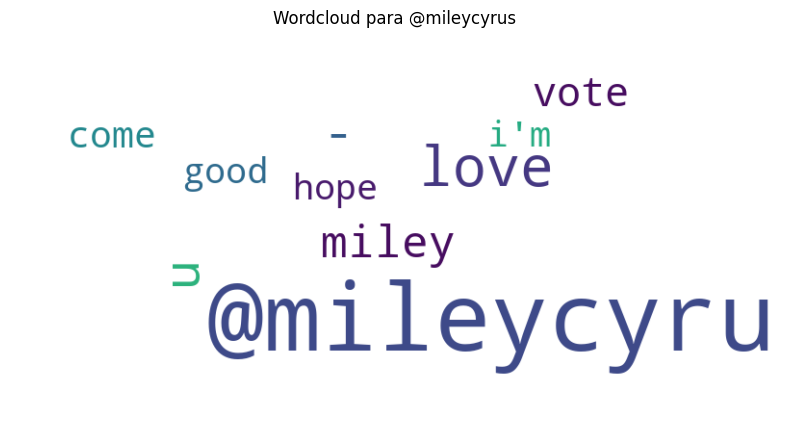

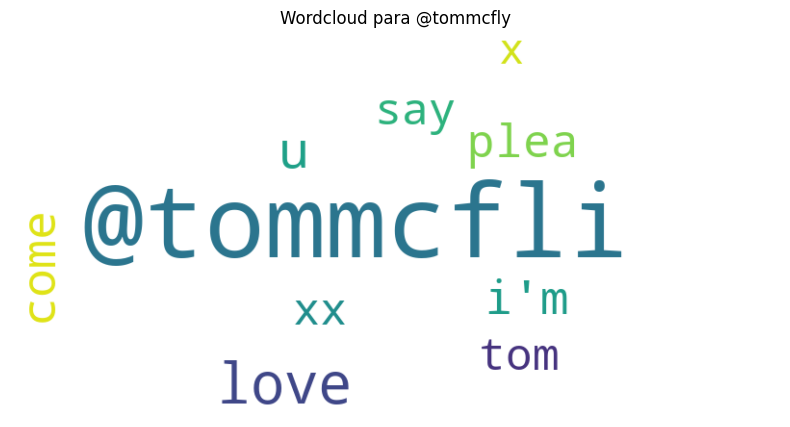

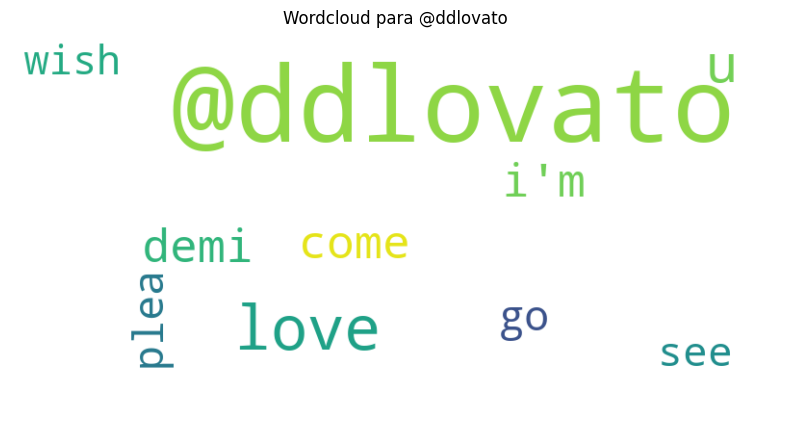

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def generate_wordcloud(word_freq, user):
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud para {user}')
    plt.show()


generate_wordcloud(top_words_mileycyrus, '@mileycyrus')
generate_wordcloud(top_words_tommcfly, '@tommcfly')
generate_wordcloud(top_words_lovato, '@ddlovato')


Los tres usuarios que más aparecen están en la industria musical y principalmente se está hablando de sentimientos hacia ellos.